# Example Four: Housing Price Preditction

***In the example, I will be demonstrating a regression problem using multiple models, and with visualization tools such as matplotlib/seaborn, data preprocessing with be taken care of by combining both pandas's DataFrame manipulation and sklearn's built-in column transformer***

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

## Data Visualization and Exploration

In [3]:
# getting overview of the data
df = pd.read_csv('housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# locate the column where there are null values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df_viz = df.iloc[:, 0:-1]
df_viz

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


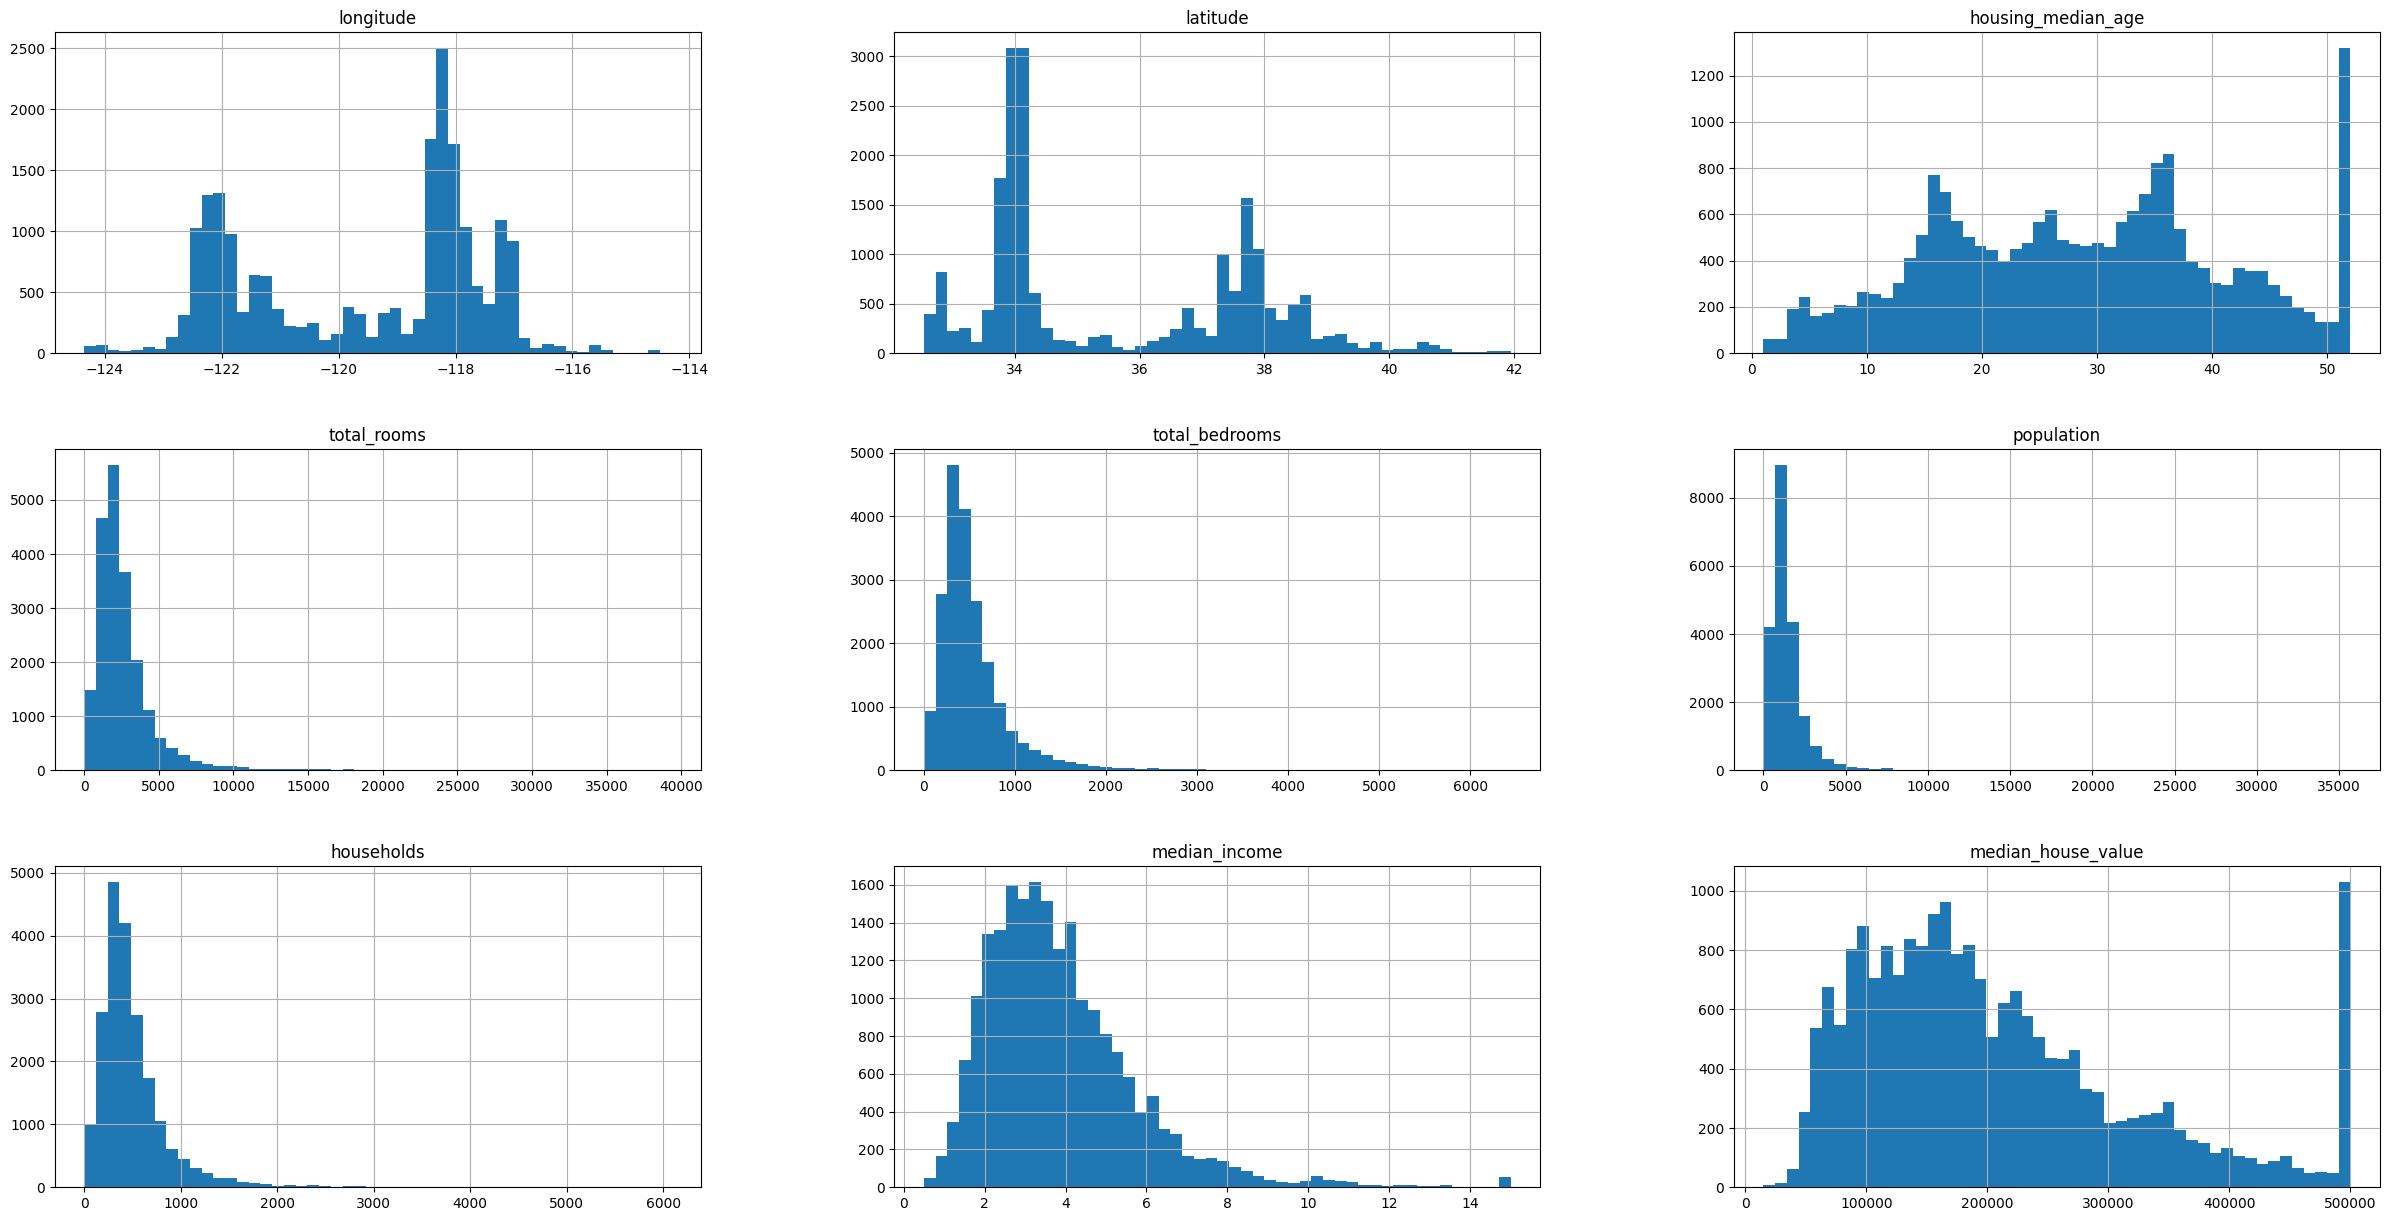

In [7]:
df_viz.hist(bins=50, figsize=(30,15))
plt.show()

***Note that here we can already notice that frequency wise, median income and median housing value has a rather similar trend, where both are somewhat grouped in the middle of the histograph.***

In [16]:
df_viz.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

***This validated the hypothesis of the possibility that income and house value might have a strong correlation***

/var/folders/t7/wb5zytnj22v3_zzj00hxr7980000gn/T/ipykernel_52176/2408524336.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + df_viz.columns.tolist(), rotation=90)
/var/folders/t7/wb5zytnj22v3_zzj00hxr7980000gn/T/ipykernel_52176/2408524336.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + df_viz.columns.tolist())


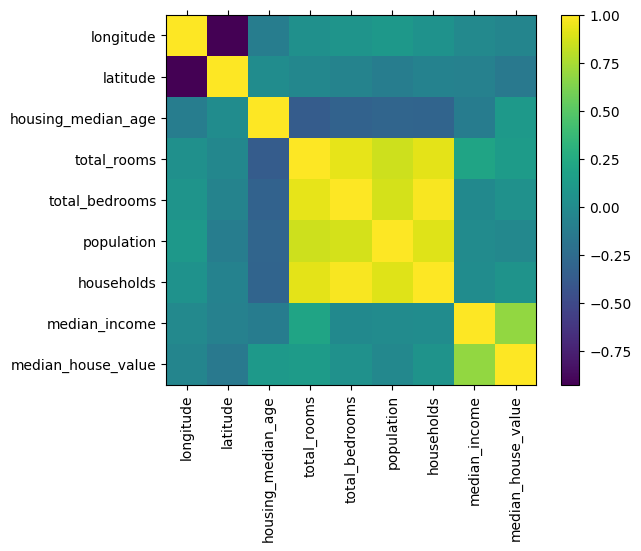

In [57]:
corr_matrix = df_viz.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_viz.corr(), interpolation=None)
fig.colorbar(cax)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
ax.set_xticklabels([''] + df_viz.columns.tolist(), rotation=90)
ax.set_yticklabels([''] + df_viz.columns.tolist())
plt.show()

***The warning here indicates that my matplotlib needs to be downgraded. So let's ignore this for now***

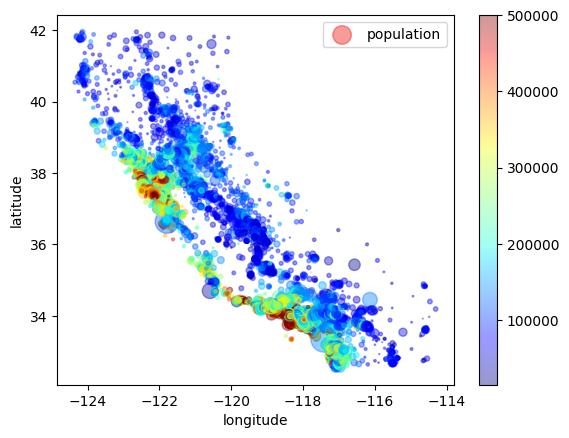

In [69]:
df_viz.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=df_viz['population']/100, c=df_viz['median_house_value'], cmap=plt.get_cmap("jet"), 
            colorbar=True, sharex=False, label='population')
plt.legend()